# IC Summer School

Group: Friends of $\pi$

Topic: Education Disparities

Members: 梁嘉琦Vincent    王子仪Cathy  陆天语Cathy  弓瀚铭Jimmy  张兆涵Vicky  冯奕然Leon  刘承昊 Chenghao  王咏怡Olivia  高祥沐Ethan  田嘉乐Jack

Coding: Leon :D

In [1]:
# Libraries
import pandas as pd
import numpy as np
from pyecharts.charts import Map
from matplotlib import pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Map
from IPython.display import HTML
from time import sleep
import statsmodels.api as sm
import country_converter as coco
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures 
from math import log

In [2]:
# Datas
edu = pd.read_csv("EDU.csv", low_memory=False)
gdp = pd.read_csv("GDP.csv", low_memory=False)
ptr = pd.read_csv("PTR.csv", low_memory=False)
sal = pd.read_csv("SAL.csv", low_memory=False)

In [3]:
# Groups
income = edu[["iso_code","income_group"]]
income = income.drop_duplicates()
income.index = range(len(income["iso_code"]))
income.columns = ["country","income"]

region = edu[["iso_code","region_group"]]
region = region.drop_duplicates()
region.index = range(len(region["iso_code"]))
region.columns = ["country","region"]

In [4]:
# Functions
def unique(df,column): # to see the values in a column
    s = pd.unique(df[column])
    return s

def ioto(df, col1, col2): # is one to one?
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2]
    print(first.count())
    first = first.count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

def gen_data(df,cat,col=None):
    test = []
    for i in range(len(list(df["iso_code"]))):
        if df["category"][i] == cat and (df["year"][i] in [2015,2016,2017]):
            if cat == "Total":
                test.append([df["iso_code"][i],df["comp_upsec_v2_m"][i]])
            else:
                test.append([df["iso_code"][i],df[col][i],df["comp_upsec_v2_m"][i]])
    # unique
    keys = []
    datas = []
    for i in test:
        if cat == "Total":
            k = i[0]
        else:
            k = [i[0],i[1]]
            
        if k not in keys:
            keys.append(k)
            datas.append(i[-1])
        else:
            index = keys.index(k)
            if np.isnan(datas[index]):
                datas[index] = i[-1]
                
    test = []
    for i in range(len(keys)):
        test.append([keys[i],datas[i]])

    test.sort(key=lambda x:x[0])
    
    # 剔除nan
    ntest = []
    for i in test:
        if not np.isnan(i[1]):
            ntest.append(i)
        
    return ntest

def llgg(original):
    new = [0 for i in range(len(original))]
    for i in range(len(original)):
        #print(original[i])
        new[i] = log(original[i])
    return new

def draw_map(title,data_set):
    dts = [[coco.convert(i[0],to="name_short"), i[1]] for i in data_set]
    
    c = (
        Map()
        .add(title, dts, "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Upper Secondary Completion Rate"),
            visualmap_opts=opts.VisualMapOpts(max_=1),
        )
        .render(f"uscr_{title.lower()}.html")
    )
    
    with open(f"./uscr_{title.lower()}.html","r") as f:
        t = f.read()
    sleep(0.4)
    return HTML(t)

#ioto(df,"country","region")

In [5]:
# Data Preparation
c4 = ['AFG', 'AGO', 'ALB', 'AUT', 'BDI', 'BEL', 'BLZ', 'BOL', 'BRA', 'CHL', 'CHN', 'CIV', 'COL', 'CRI', 'CYP', 'DEU', 'DJI', 'DOM', 'ECU', 'EGY',
 'ESP', 'EST', 'FIN', 'GEO', 'GHA','GRC', 'GTM', 'HND', 'IDN', 'IND', 'ITA', 'JOR', 'KAZ', 'KOR', 'LAO', 'LTU', 'LUX', 'LVA', 'MEX', 'MLI', 'MMR',
 'MRT', 'NOR', 'NPL', 'PAN', 'PER', 'PHL', 'PRT', 'PSE', 'RWA', 'SEN', 'SLE', 'SLV', 'SVN', 'TCD', 'THA', 'TLS', 'TZA', 'USA','ZAF']

ss = sal.loc[lambda x:x["sex"] == "Total",["country","value"]]
ss.index = [i for i in range(len(ss["country"]))]

total = gen_data(edu,"Total")

uu = pd.DataFrame({
    "country":[i[0] for i in total],
    "uscr":[i[1] for i in total]
})
color_map_region = {
    'Central and Southern Asia':"red",
    'Sub-Saharan Africa':"purple",
    'Europe and Northern America':"green",
    'Northern Africa and Western Asia':"yellow",
    'Oceania':"blue",
    'Latin America and the Caribbean':"cyan",
    'Eastern and South-eastern Asia':"orange"
}
color_map_income = {
    'Low income':"red",
    'Lower middle income':"orange",
    'Upper middle income':"green",
    'High income':"blue",
    'Not classified':"grey"
}
gg = gdp[["country","value"]]
pp = ptr[["country","value"]]
cc = c4
u2 = [0 for i in range(len(cc))]
g2 = [0 for i in range(len(cc))]
p2 = [0 for i in range(len(cc))]
s2 = [0 for i in range(len(cc))]
r2 = ["" for i in range(len(cc))]
i2 = ["" for i in range(len(cc))]
for i in range(len(cc)):
    for j in range(len(uu["country"])):
        if uu["country"][j] == cc[i]:
            u2[i] = uu["uscr"][j]
    
    for j in range(len(gg["country"])):
        if gg["country"][j] == cc[i]:
            g2[i] = gg["value"][j]
    
    for j in range(len(pp["country"])):
        if pp["country"][j] == cc[i]:
            p2[i] = pp["value"][j]
    
    for j in range(len(ss["country"])):
        if ss["country"][j] == cc[i]:
            s2[i] = ss["value"][j]
    
    for j in range(len(region["country"])):
        if region["country"][j] == cc[i]:
            r2[i] = color_map_region[region["region"][j]]
            
    for j in range(len(region["country"])):
        if income["country"][j] == cc[i]:
            i2[i] = color_map_income[income["income"][j]]

## Graphs for economic factors

### Economic level

Rich countries may invest more on education, leading to a high education level. 

GPD is used to measure the economic level of one country. The relationship is shown below. 

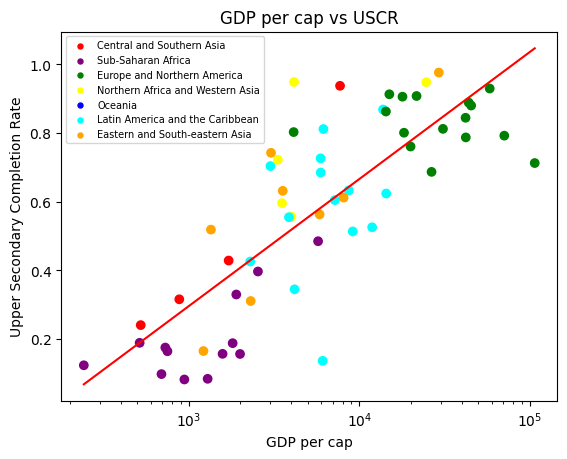

In [12]:
# GDP
plt.scatter(g2,u2,c=r2)
legendy = list(color_map_region.keys())
legendx = [plt.scatter([],[],c=i) for i in color_map_region.values()]

x_lg = pd.DataFrame(llgg(g2))
model = LinearRegression()
model.fit(x_lg,pd.DataFrame(u2))
xxx = np.linspace(min(g2),max(g2),50)
# print(model.score(x_lg,pd.DataFrame(u2)))
plt.plot(xxx,model.predict(pd.DataFrame(llgg(xxx))),color = "red")
plt.xscale("log")
plt.xlabel("GDP per cap")
plt.ylabel("Upper Secondary Completion Rate")
plt.title("GDP per cap vs USCR")
plt.legend(legendx,legendy,markerscale=0.6,fontsize=7)

### Education Resources

In some countries, they have more teachers who can offer better education to students. 

Education resources level is measured by pupil-teacher rate. 

0.43008629224103745


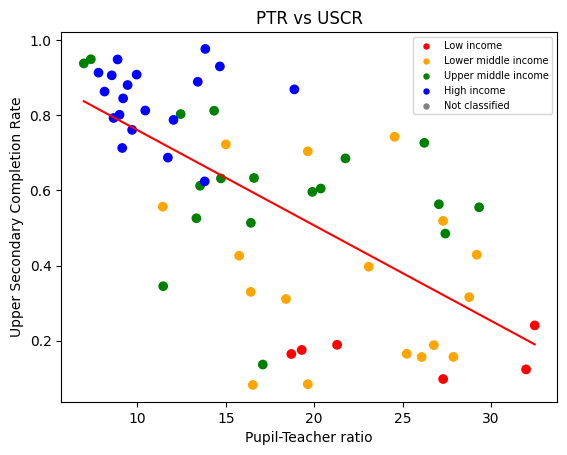

In [11]:
# PTR
plt.scatter(p2,u2,c=i2)
legendy = list(color_map_income.keys())
legendx = [plt.scatter([],[],c=i) for i in color_map_income.values()]

x_lg = pd.DataFrame(p2)
model = LinearRegression()
model.fit(x_lg,pd.DataFrame(u2))
xxx = np.linspace(min(p2),max(p2),50)
print(model.score(x_lg,pd.DataFrame(u2)))
plt.plot(xxx,model.predict(pd.DataFrame(xxx)),color = "red")
plt.xlabel("Pupil-Teacher ratio")
plt.ylabel("Upper Secondary Completion Rate")
plt.title("PTR vs USCR")
plt.legend(legendx,legendy,markerscale=0.6,fontsize=7)

### Family income level

Rich family may sends its children to better schools. 

The one-hour wage is used to measure this income level.

0.44060377772638404


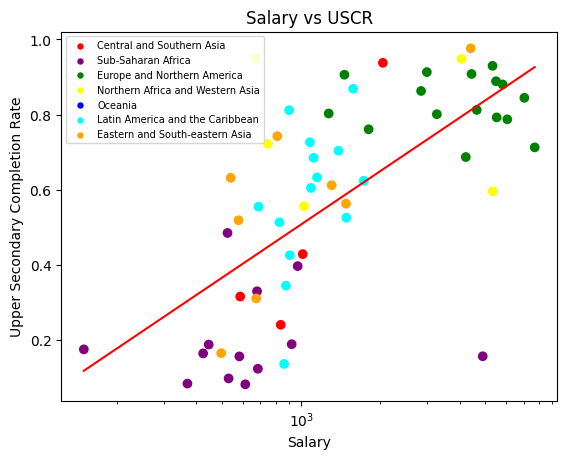

In [10]:
# Salary
plt.scatter(s2,u2,c=r2)
legendy = list(color_map_region.keys())
legendx = [plt.scatter([],[],c=i) for i in color_map_region.values()]

x_lg = pd.DataFrame(llgg(s2))
model = LinearRegression()
model.fit(x_lg,pd.DataFrame(u2))
xxx = np.linspace(min(s2),max(s2),50)
print(model.score(x_lg,pd.DataFrame(u2)))
plt.plot(xxx,model.predict(pd.DataFrame(llgg(xxx))),color = "red")
plt.xlabel("Salary")
plt.ylabel("Upper Secondary Completion Rate")
plt.xscale("log")
plt.title("Salary vs USCR")
plt.legend(legendx,legendy,markerscale=0.6,fontsize=7)